## K2 light curve

N. Gosnell 7-17-18  

Let's look at the K2 light curve in more detail

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [16]:
df = pd.read_csv('../data/reduced/211414597.csv')

In [17]:
df.head()

,cadenceNum,cadenceTimes,singleScaleFluxValues,multiScaleFluxValues,uncertainties,gapIndicators,jumpIndicators
0,107552,57139.1062,1.160491e+08,1.160491e+08,0.000,1,0
1,107553,57139.1266,1.160491e+08,1.160491e+08,31735.625,1,0
2,107554,57139.1471,1.160491e+08,1.160491e+08,31735.625,1,0
3,107555,57139.1675,1.160491e+08,1.160491e+08,31735.625,1,0
4,107556,57139.1879,1.160491e+08,1.160491e+08,31735.625,1,0


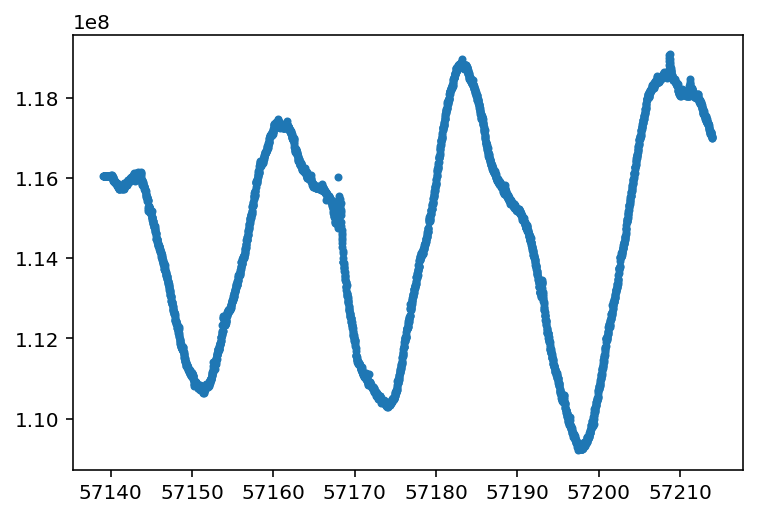

In [18]:
plt.plot(df.cadenceTimes, df.singleScaleFluxValues, '.');

In [78]:
from astropy.stats import LombScargle

In [104]:
times = np.array(df.cadenceTimes)
freq = np.linspace(0.005, 0.2, 1000)
power = LombScargle(times, normflux).power(freq)
period = 1 / freq[np.where(power == power.max())]
print(period)

[ 23.43420127]


This is similar to the ASSASN period, so that's good. It also is NOT the binary period, which is 18.396 days (Leiner et al. 2017). 

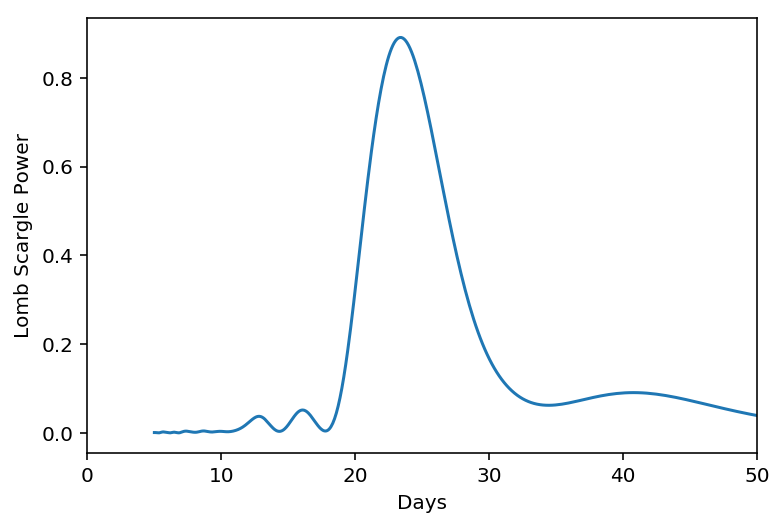

In [109]:
plt.plot((1/freq), power)
plt.xlabel("Days")
plt.ylabel("Lomb Scargle Power")
plt.xlim(0,50);

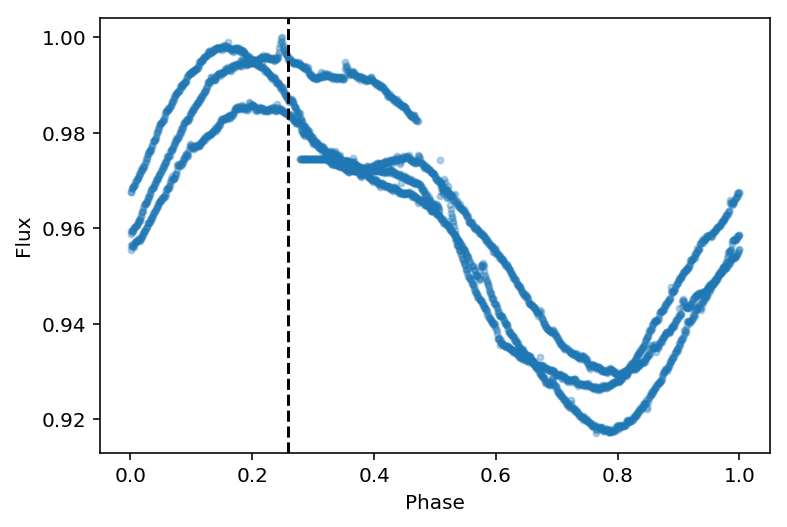

In [118]:
obs = np.array(57138.64)
obsphase = np.mod(obs,period) / period

plt.plot(np.mod(df.cadenceTimes,period) / period, normflux, '.', alpha=0.3)
plt.axvline(obsphase, linestyle='dashed', color='k')
plt.xlabel("Phase")
plt.ylabel("Flux");

So, the IGRINS observation is at max light, which is the least visible spot coverage. How does this correspond to using the light curve to set a minimum filling factor? Isn't that the minimum filling factor seen at light curve minimum?  

Reminder that the IGRINS spectrum was obtained only half a day before the K2 light curve started: 

In [122]:
print(times.min() - obs)

0.466200000003
